In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import pandas as pd
path = "C:\\Users\\alok\\Desktop\\Inzint\\datasets\\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)
print("Columns: ",df.columns)
print("Info: ",df.info())

Columns:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-

In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # Convert 'TotalCharges' to numeric
df = df.dropna()  # Drop rows with missing values
df = df.drop(columns=['customerID'])  # Remove customerID column

In [4]:
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == np.object:
        df[column] = encoder.fit_transform(df[column])

C:\Users\alok\AppData\Local\Temp\ipykernel_13336\866765483.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:
C:\Users\alok\AppData\Local\Temp\ipykernel_13336\866765483.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:
C:\Users\alok\AppData\Local\Temp\ipykernel_13336\866765483.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by it

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  
 17  

In [6]:
X = df.drop('Churn', axis=1)
y = df['Churn']



In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
141/141 [==============================] - 1s 4ms/step - loss: 0.4719 - accuracy: 0.7742 - val_loss: 0.4143 - val_accuracy: 0.8044
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8002 - val_loss: 0.4149 - val_accuracy: 0.8053
Epoch 3/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8049 - val_loss: 0.4065 - val_accuracy: 0.8169
Epoch 4/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8098 - val_loss: 0.4061 - val_accuracy: 0.8027
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8098 - val_loss: 0.4124 - val_accuracy: 0.8062
Epoch 6/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8140 - val_loss: 0.4071 - val_accuracy: 0.8124
Epoch 7/10
141/141 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8184 - val_loss: 0.4083 - val_accuracy: 0.8098
Epoch 

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7868
Test Accuracy: 0.7867803573608398
44/44 [==============================] - 0s 1ms/step


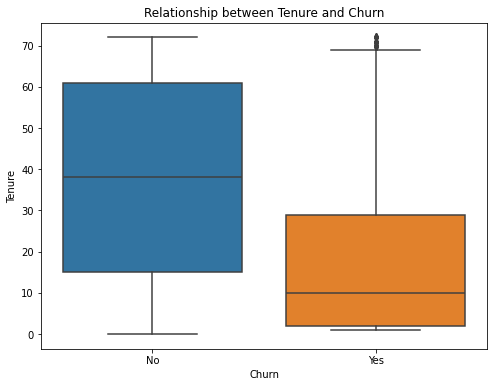

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(path)
# Relationship between tenure and Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Relationship between Tenure and Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

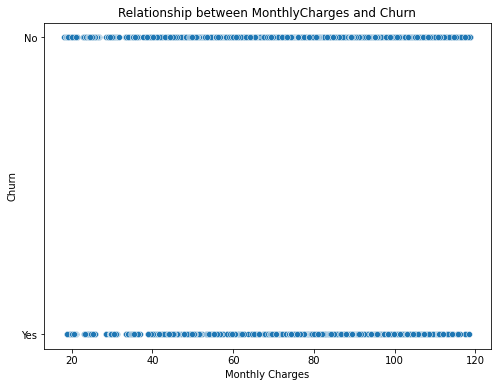

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='Churn', data=df)
plt.title('Relationship between MonthlyCharges and Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.show()

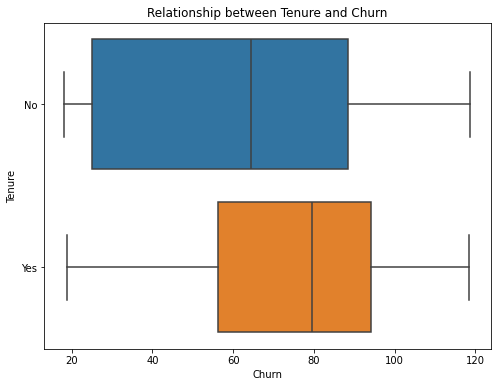

In [20]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='MonthlyCharges', y='Churn', data=df)
plt.title('Relationship between Tenure and Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()